In this notebook, 10 different type of animal images are fed into the pretrained model and using transfer learning , the accuracy of classification is checked.  
This is the third slice of images into train , validation and test set images.  
The pretrained model used is VGG16.



In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import os

In [2]:
## initialise the path to the data folder
train_dir = '../input/animals10/raw-img'


In [3]:
## Get the class labels
LABELS = os.listdir(train_dir)
LABELS.sort()
LABELS

['cane',
 'cavallo',
 'elefante',
 'farfalla',
 'gallina',
 'gatto',
 'mucca',
 'pecora',
 'ragno',
 'scoiattolo']

In [4]:
## map the labels to numeric values 

names = {LABELS[0] : 0 ,LABELS[1]: 1 , LABELS[2] : 2  , LABELS[3] : 3 , LABELS[4] : 4 , LABELS[5] : 5, LABELS[6] : 6, LABELS[7] : 7 , LABELS[8] : 8 , LABELS[9] : 9}

In [5]:
names

{'cane': 0,
 'cavallo': 1,
 'elefante': 2,
 'farfalla': 3,
 'gallina': 4,
 'gatto': 5,
 'mucca': 6,
 'pecora': 7,
 'ragno': 8,
 'scoiattolo': 9}

In [6]:
import cv2


def load_images_from_folder(path, dirs):
    """
    Read in the images. 
    The image array and image class are saved into a list
    """
    images = []
    img_class = []
    for c in dirs:
        
        file_path = os.path.join(path, c)
        
        for file in os.listdir(file_path):
        
            img_class.append(c)
            img = cv2.imread(os.path.join(file_path,file))
            img = cv2.resize(img , (224,224))
            if img is not None:
                images.append(img)
                
    return images, img_class

images , image_class = load_images_from_folder("../input/animals10/raw-img", LABELS)

In [7]:
len(images) , len(image_class)

(26179, 26179)

In [8]:
type(images) , type(image_class)

(list, list)

In [9]:
images = np.array(images)
images.shape

(26179, 224, 224, 3)

In [10]:
## convert the character class names to numeric values 
image_class_numeric = [names[i] for i in image_class]
pd.Series(image_class_numeric).value_counts()

0    4863
8    4821
4    3098
1    2623
3    2112
6    1866
9    1862
7    1820
5    1668
2    1446
dtype: int64

In [11]:
image_class_numeric = np.array(image_class_numeric)
image_class_numeric.shape

(26179,)

In [12]:
## Using sklearn train_test_split . Change the random number for a different slice of images 
train, x_val_test, y_train, y_val_test = train_test_split(images, image_class_numeric , stratify = image_class_numeric, test_size = 0.25 , random_state = 32)
val, test, y_val, y_test = train_test_split(x_val_test, y_val_test , stratify = y_val_test, test_size = 0.4)

print("train size :{}".format(train.shape))
print("y_train size :{}".format(y_train.shape))
##
print("val size :{}".format(val.shape))
print("y_val size :{}".format(y_val.shape))
##
print("test size :{}".format(test.shape))
print("y_test size :{}".format(y_test.shape))

train size :(19634, 224, 224, 3)
y_train size :(19634,)
val size :(3927, 224, 224, 3)
y_val size :(3927,)
test size :(2618, 224, 224, 3)
y_test size :(2618,)


In [13]:
train = train[:1000]
y_train = y_train[:1000]

In [14]:
## number of classes in train data 
pd.Series(y_train).value_counts()

8    193
0    185
4    120
1     97
3     79
5     72
9     69
7     66
6     61
2     58
dtype: int64

In [15]:
val = val[:300]
y_val = y_val[:300]

In [16]:
## no of classes in validation data 
pd.Series(y_val).value_counts()

0    68
8    53
4    27
2    24
7    24
1    24
6    23
3    22
9    21
5    14
dtype: int64

In [17]:
test = test[:200]
y_test = y_test[:200]

In [18]:
## no of classes in test data 
pd.Series(y_test).value_counts()

8    41
0    33
4    27
1    21
6    17
5    16
3    14
7    11
9    11
2     9
dtype: int64

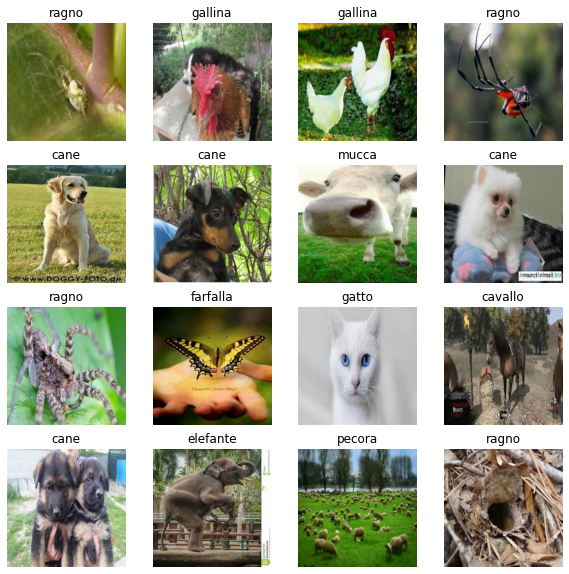

In [19]:
## visualize train set images

plt.figure(figsize=(10, 10))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    ## in order for the image to be displayed in its real color 
    rgb = cv2.cvtColor(train[i], cv2.COLOR_BGR2RGB)
    plt.imshow(rgb, cmap = plt.cm.Spectral)
    #
    label = y_train[i]
    name = LABELS[label]
    plt.title(name)
    plt.axis("off")

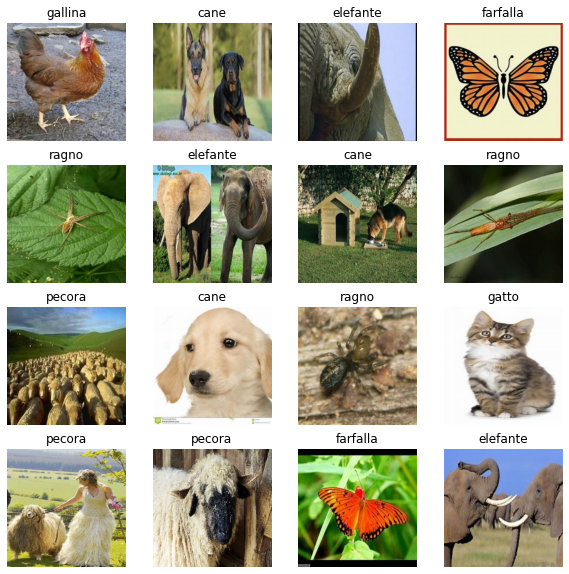

In [20]:
## visualize validation set images

plt.figure(figsize=(10, 10))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    ## in order for the image to be displayed in its real color 
    rgb = cv2.cvtColor(val[i], cv2.COLOR_BGR2RGB)
    plt.imshow(rgb, cmap = plt.cm.Spectral)
    #
    label = y_val[i]
    name = LABELS[label] ## name of the animal class
    plt.title(name)
    plt.axis("off")


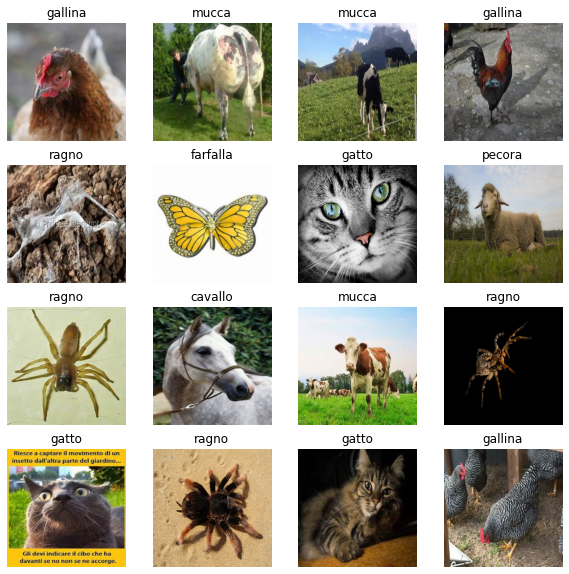

In [21]:
## visualize test set images

plt.figure(figsize=(10, 10))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    ## in order for the image to be displayed in its real color 
    rgb = cv2.cvtColor(test[i], cv2.COLOR_BGR2RGB)
    plt.imshow(rgb, cmap = plt.cm.Spectral)
    #
    label = y_test[i]
    name = LABELS[label]
    plt.title(name)
    plt.axis("off")

In [ ]:
train_processed = tf.keras.applications.vgg16.preprocess_input(train)
#
val_processed = tf.keras.applications.vgg16.preprocess_input(val)
#
test_processed = tf.keras.applications.vgg16.preprocess_input(test)

2022-02-01 14:58:06.513447: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-01 14:58:06.637071: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-01 14:58:06.638324: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-01 14:58:06.640258: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

58900480/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dense (Dense)                (None, 1024)              525312    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total params: 15,250,250
Trainable params: 535,562
Non-trainable params: 14,714,688
_________________________________________________________________


2022-02-01 14:58:10.008726: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 150528000 exceeds 10% of free system memory.
2022-02-01 14:58:10.109979: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 150528000 exceeds 10% of free system memory.
2022-02-01 14:58:10.152171: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-02-01 14:58:11.893186: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005
2022-02-01 14:58:23.218180: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 45158400 exceeds 10% of free system memory.
2022-02-01 14:58:23.252943: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 45158400 exceeds 10% of free system memory.


CPU times: user 34.3 s, sys: 6.96 s, total: 41.3 s
Wall time: 2min 22s
2/7 [=======>......................] - ETA: 0s - loss: 1.4812 - accuracy: 0.9062

2022-02-01 15:00:32.862930: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 30105600 exceeds 10% of free system memory.


7/7 [==============================] - 0s 56ms/step - loss: 2.1030 - accuracy: 0.8850
Test image accuracy :0.8849999904632568


2022-02-01 15:00:34.921471: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


              precision    recall  f1-score   support

        cane       0.94      0.94      0.94        33
     cavallo       0.76      0.90      0.83        21
    elefante       1.00      0.78      0.88         9
    farfalla       1.00      0.93      0.96        14
     gallina       0.96      0.85      0.90        27
       gatto       1.00      0.75      0.86        16
       mucca       0.70      0.82      0.76        17
      pecora       0.89      0.73      0.80        11
       ragno       0.95      0.98      0.96        41
  scoiattolo       0.67      0.91      0.77        11

    accuracy                           0.89       200
   macro avg       0.89      0.86      0.87       200
weighted avg       0.90      0.89      0.89       200



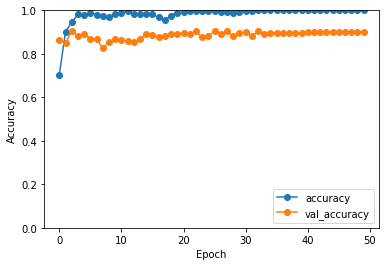

In [22]:
## Transfer learning with VGG16 . 
base_Net = tf.keras.applications.VGG16(include_top = False, 
                         weights ='imagenet', 
                         input_shape = (224,224,3), 
                         pooling='avg',
                         )

base_Net.trainable = False
#Adding the final layers to the above base models where the actual classification is done in the dense layers
model_Net = tf.keras.models.Sequential()
model_Net.add(base_Net)
#model_Net.add(tf.keras.layers.Rescaling(scale = 1./255))
model_Net.add(tf.keras.layers.Dense(1024))
model_Net.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model_Net.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_Net.summary()

# Training the CNN on the Train data and evaluating it on the val data
%time history = model_Net.fit(train , y_train, validation_data = (val, y_val), epochs = 50, verbose = 0 )

##
test_loss, test_acc = model_Net.evaluate(test , y_test)
print("Test image accuracy :{}".format(test_acc))
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
model_Net.save('vgg16')
##
test_predicted = model_Net.predict(test)
##
predicted_label = []
for i in test_predicted:
    label =  np.argmax(i, axis = -1)
    predicted_label.append(label)
    
## classification report 
print(classification_report(y_test, predicted_label, target_names = LABELS))